In [594]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [595]:
#importing file 

df=pd.read_csv("Churn.csv",sep=',')

In [596]:
df.shape

(7032, 21)

In [597]:
df.size
df.head()

147672

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,8684.80,No
1,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,8672.45,No
2,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,8670.10,No
3,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,8594.40,No
4,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,8564.75,No


In [598]:
df=df.drop(['customerID'],1)


In [599]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,19.00,Yes
7028,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,18.90,No
7029,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18.85,No
7030,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,18.85,Yes
7031,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,18.80,No


In [600]:
#check for missing value 
pd.isnull(df).any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [601]:
pd.isnull(df).sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [603]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162116,32.366894,64.748329,2283.300441
std,0.368583,24.554333,30.093269,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [604]:
# find out thge number whose churn vs none
print("Counts of label")
df.groupby("Churn").size()

Counts of label


Churn
No     5166
Yes    1866
dtype: int64

In [605]:
#dUMMY CODING CHURN
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical(df[col]).codes

In [606]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,1,0,55,1,2,0,2,2,0,0,0,0,1,0,1,60.00,8684.80,0
1,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,1,3,20.05,8672.45,0
2,0,1,0,0,6,0,1,0,0,0,0,0,2,2,0,1,2,44.40,8670.10,0
3,0,0,1,0,68,1,0,0,0,2,0,2,2,0,2,0,0,64.10,8594.40,0
4,1,0,0,0,13,1,0,0,0,2,0,2,2,2,0,0,3,73.35,8564.75,0


In [607]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162116,0.483220,0.299630,32.366894,0.903299,0.940273,0.873009,0.789960,0.906854,0.904295,0.797355,0.985068,0.992747,0.690557,0.591724,1.574659,64.748329,2283.300441,0.265358
std,0.500014,0.368583,0.499754,0.458129,24.554333,0.295571,0.948609,0.738020,0.859722,0.880096,0.879821,0.861496,0.884886,0.884982,0.833846,0.491550,1.068072,30.093269,2266.771362,0.441555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [608]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.002585,-0.001677,0.010935,0.005779,-0.007515,-0.006606,-0.000890,-0.014746,-0.010803,0.001183,-0.006872,-0.006110,-0.008441,0.000413,-0.012168,0.017187,-0.015090,-0.008425,-0.008862
SeniorCitizen,-0.002585,1.000000,0.016315,-0.211059,0.017613,0.008145,0.145663,-0.032537,-0.127719,-0.013072,-0.020568,-0.150940,0.031843,0.048080,-0.142178,0.156560,-0.039420,0.220442,0.008300,0.149866
Partner,-0.001677,0.016315,1.000000,0.452153,0.380748,0.017899,0.141892,0.001355,0.150856,0.153441,0.166653,0.127048,0.137890,0.129483,0.295393,-0.014866,-0.156061,0.097106,0.001469,-0.150618
Dependents,0.010935,-0.211059,0.452153,1.000000,0.159978,-0.001314,-0.025578,0.045250,0.151865,0.091100,0.080329,0.133686,0.046823,0.020796,0.243492,-0.111639,-0.040928,-0.114002,0.004619,-0.163897
tenure,0.005779,0.017613,0.380748,0.159978,1.000000,0.007594,0.343972,-0.031138,0.325466,0.370771,0.370693,0.323363,0.288997,0.296782,0.671775,0.005778,-0.369892,0.247855,0.008336,-0.352425
PhoneService,-0.007515,0.008145,0.017899,-0.001314,0.007594,1.000000,-0.020602,0.387062,-0.015015,0.024419,0.003785,-0.018878,0.055383,0.044080,0.002065,0.016027,-0.003709,0.247137,-0.029984,0.011381
MultipleLines,-0.006606,0.145663,0.141892,-0.025578,0.343972,-0.020602,1.000000,-0.108959,0.007112,0.117186,0.122152,0.011815,0.175321,0.181270,0.111487,0.165175,-0.178088,0.433650,-0.005313,0.037164
InternetService,-0.000890,-0.032537,0.001355,0.045250,-0.031138,0.387062,-0.108959,1.000000,-0.028147,0.036091,0.045239,-0.025717,0.107731,0.098760,0.099534,-0.139019,0.086999,-0.323554,-0.012939,-0.047588
OnlineSecurity,-0.014746,-0.127719,0.150856,0.151865,0.325466,-0.015015,0.007112,-0.028147,1.000000,0.185609,0.175554,0.284915,0.044298,0.055760,0.374567,-0.158189,-0.096842,-0.054020,-0.006751,-0.289638
OnlineBackup,-0.010803,-0.013072,0.153441,0.091100,0.370771,0.024419,0.117186,0.036091,0.185609,1.000000,0.187042,0.195890,0.146690,0.136271,0.281080,-0.012632,-0.124917,0.119874,0.007764,-0.195874


In [609]:
eda_report = pandas_profiling.ProfileReport(df)

In [610]:
eda_report.to_file("churn_eda.html")

In [611]:
pwd()

'C:\\Users\\win10\\Desktop\\Machine Learning\\ML\\ML'

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null int8
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int8
Dependents          7032 non-null int8
tenure              7032 non-null int64
PhoneService        7032 non-null int8
MultipleLines       7032 non-null int8
InternetService     7032 non-null int8
OnlineSecurity      7032 non-null int8
OnlineBackup        7032 non-null int8
DeviceProtection    7032 non-null int8
TechSupport         7032 non-null int8
StreamingTV         7032 non-null int8
StreamingMovies     7032 non-null int8
Contract            7032 non-null int8
PaperlessBilling    7032 non-null int8
PaymentMethod       7032 non-null int8
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int8
dtypes: float64(2), int64(2), int8(16)
memory usage: 329.7 KB


In [613]:
#X=df.drop(['StreamingMovies','OnlineBackup','Contract','Churn'],1)

X=df.drop(['Churn'],1)

In [614]:
y=df['Churn']

In [615]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [616]:
X_train.shape


(5625, 19)

In [617]:
X_test.shape


(1407, 19)

In [618]:
y_train.shape


(5625,)

In [619]:
y_test.shape

(1407,)

In [620]:
X_train.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [621]:
clf1 = tree.DecisionTreeClassifier(random_state=42)
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=19, min_samples_split=100,random_state=42)

dot_data = tree.export_graphviz(clf, out_file="treeChurn.dot",
                                feature_names=X.columns,
                                rounded=True,
                                filled=True,
                                special_characters=True)

In [622]:
clf1=clf1.fit(X_train,y_train)
clf2=clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)


In [623]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

In [624]:
print("Model Accuracy1")
metrics.accuracy_score(y_test,y_pred1)
print("Classification Report1")
print(metrics.classification_report(y_test,y_pred1,labels=None, target_names=None, sample_weight=None, digits=2))
print("Roc Auc1")
metrics.roc_auc_score(y_test,y_pred1)

print("Model Accuracy2")
metrics.accuracy_score(y_test,y_pred2)
print("Classification Report2")
print(metrics.classification_report(y_test,y_pred2,labels=None, target_names=None, sample_weight=None, digits=2))
print("Roc Auc2")
metrics.roc_auc_score(y_test,y_pred2)

Model Accuracy1


0.7306325515280739

Classification Report1
             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1019
          1       0.51      0.51      0.51       388

avg / total       0.73      0.73      0.73      1407

Roc Auc1


0.6632146434244204

Model Accuracy2


0.7853589196872779

Classification Report2
             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1019
          1       0.67      0.44      0.53       388

avg / total       0.77      0.79      0.77      1407

Roc Auc2


0.6794512509737665

Confisusion Matrix1


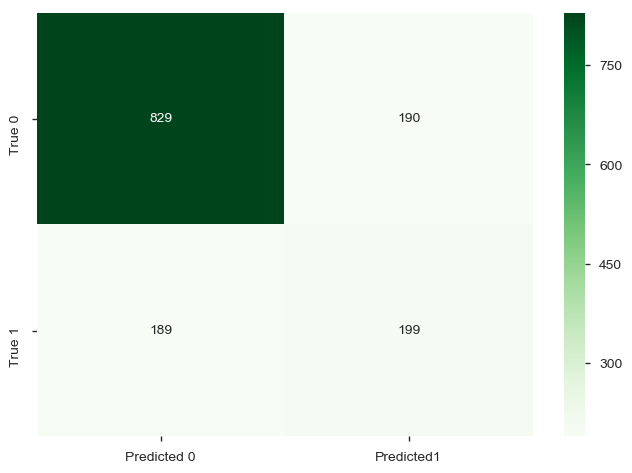

Confisusion Matrix2


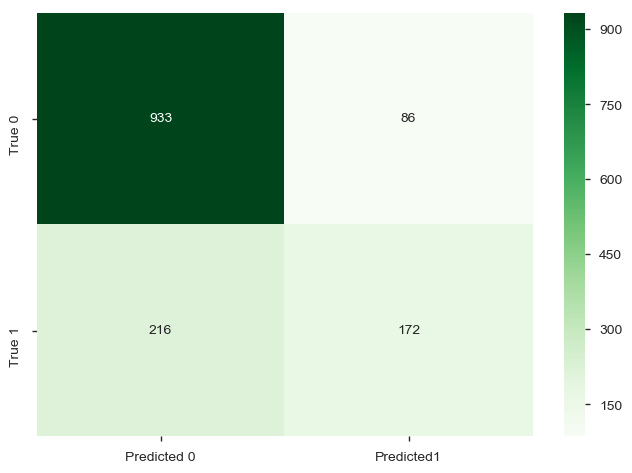

In [625]:
#Confusion Matrix
print("Confisusion Matrix1")
cf2=metrics.confusion_matrix(y_test,y_pred1)
lbl1=["Predicted 0","Predicted1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf2,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();


#Confusion Matrix
print("Confisusion Matrix2")
cf2=metrics.confusion_matrix(y_test,y_pred2)
lbl1=["Predicted 0","Predicted1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf2,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

Features Importance

In [626]:
clf1.feature_importances_
clf1.feature_importances_

array([0.01775666, 0.01730347, 0.01714776, 0.01588762, 0.14369164,
       0.00233182, 0.02282608, 0.0312699 , 0.04409729, 0.01773385,
       0.01306329, 0.01370738, 0.00745134, 0.01113736, 0.16811832,
       0.01923981, 0.04138853, 0.20180729, 0.19404058])

array([0.01775666, 0.01730347, 0.01714776, 0.01588762, 0.14369164,
       0.00233182, 0.02282608, 0.0312699 , 0.04409729, 0.01773385,
       0.01306329, 0.01370738, 0.00745134, 0.01113736, 0.16811832,
       0.01923981, 0.04138853, 0.20180729, 0.19404058])

In [627]:

features1=pd.DataFrame(clf1.feature_importances_,X.columns)
features2=pd.DataFrame(clf2.feature_importances_,X.columns)

In [628]:
features1.columns=["Importance"]
features2.columns=["Importance"]
features1
features2

,Importance
gender,0.017757
SeniorCitizen,0.017303
Partner,0.017148
Dependents,0.015888
tenure,0.143692
PhoneService,0.002332
MultipleLines,0.022826
InternetService,0.031270
OnlineSecurity,0.044097
OnlineBackup,0.017734


,Importance
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.097179
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.175439
OnlineBackup,0.000000


In [629]:
export_graphviz(clf1,
                out_file="tree_churn1.dot",
                feature_names=X.columns,
                rounded=True,
                filled=True)

In [630]:
export_graphviz(clf2,
                out_file="tree_churn2.dot",
                feature_names=X.columns,
                rounded=True,
                filled=True)

Run The below code on your command prompt first check for your location where it is and set the same location in command prompt
<br/>
$ dot -Tpng tree_churn.dot -o tree_churn.png
 <br/>
 Then run the below code in new cell
 <br />
 `<img src="tree_churn.png" width=60% height=60%>`

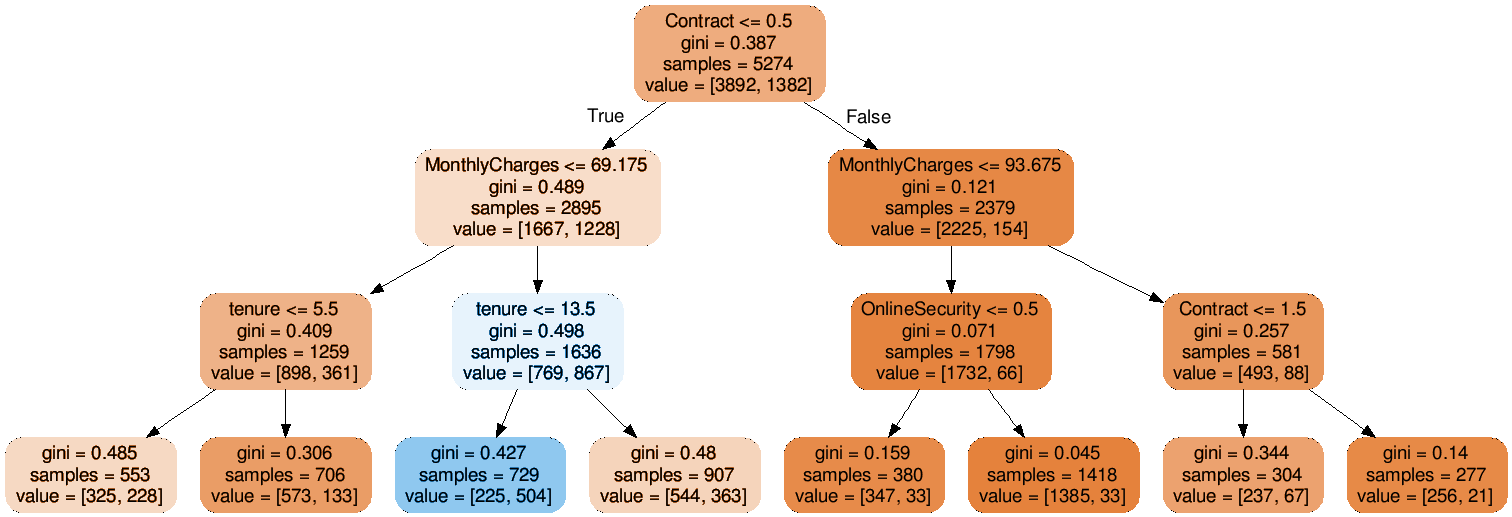

In [631]:
from IPython.display import display, Image
display(Image(filename='tree_churn2.png'))

from PIL import Image
image = Image.open('tree_churn.png')
image.show()

In [632]:
n_estimaters=[10,500,1000,2000]
criterian=['gini','entropy']
min_samples_split=[2,5,10]
max_depth=[5,10,20,30,40,50,None]

In [633]:
params_grid = {'min_samples_split': min_samples_split,
               'min_samples_leaf': list(range(2, 10)),
               'max_depth':list(range(2,6)),
               'max_leaf_nodes': list(range(2, 20)),
               'criterion':criterian}

In [634]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params_grid,cv=5, n_jobs=-1, verbose=1)


In [643]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 4080 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 8280 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 13680 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 17280 out of 17280 | elapsed:   37.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [2, 3, 4, 5], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [636]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [637]:
grid_search_cv.best_score_

0.7905777777777778

In [638]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.7761194029850746

In [639]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

0.7306325515280739

In [640]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

0.7853589196872779

In [641]:
cv=pd.DataFrame(grid_search_cv.cv_results_)

In [642]:
cv.to_csv("result_churn.csv")